In [1]:
import pandas as pd
import numpy as np
import urllib.request
url = "https://finkode.com/mh/mumbai.html"
page = urllib.request.urlopen(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")

In [4]:
page

In [4]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="en">
<head>
<title>Mumbai District Pincode List, Maharashtra Postal Pin Codes | FinKode.com</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="Mumbai Pin code list. Search and lookup pincode of all delivery Post Offices in Mumbai district of Maharashtra." name="description"/>
<style type="text/css">
body {
  font-family: Arial, San-Serif;
  font-size: 15px;
  max-width: 960px;
  margin: 0 auto;
  background: #fff;
}
#c760 {max-width:960px;padding:0 .5em;background:#eef;border-radius:10px;}
input[type="text"] {padding: 8px;vertical-align: middle; margin:0px 6px}
input[type="submit"] {height: 37px;padding: 0px 12px;vertical-align: middle;}

table {
  width:100%;
  text-align:left;
}
td {line-height:2em;vertical-align:top}
th, .bc {
  background:#eee;
}
.hl {
 color: #666;
 font-size: .8em;
}
.plist {
  width:100%;
}
</style>
</head>
<body>
<div id="c760">
<h1>India 

In [5]:
soup.title

<title>Mumbai District Pincode List, Maharashtra Postal Pin Codes | FinKode.com</title>

In [6]:
all_tables=soup.find_all("table")
all_tables

[<table class="plist"><caption>List of Post Offices/ Pincodes in areas under Mumbai district, Maharashtra</caption><tr><th scope="col">Post Office</th><th scope="col">District</th><th scope="col">Pincode</th></tr><tr><td><a href="/ai-staff-colony-400029.html">A I Staff Colony S.O</a></td><td>Mumbai</td><td><a href="/400029.html">400029</a></td></tr><tr><td><a href="/aareymilk-colony-400065.html">Aareymilk Colony S.O</a></td><td>Mumbai</td><td><a href="/400065.html">400065</a></td></tr><tr><td><a href="/agripada-400011.html">Agripada S.O</a></td><td>Mumbai</td><td><a href="/400011.html">400011</a></td></tr><tr><td><a href="/ambewadi-s-o-400004.html">Ambewadi S.O (Mumbai)</a></td><td>Mumbai</td><td><a href="/400004.html">400004</a></td></tr><tr><td><a href="/andheri-east-400069.html">Andheri East S.O</a></td><td>Mumbai</td><td><a href="/400069.html">400069</a></td></tr><tr><td><a href="/andheri-400053.html">Andheri H.O</a></td><td>Mumbai</td><td><a href="/400053.html">400053</a></td></tr

In [6]:
right_table = all_tables[0]

NameError: name 'all_tables' is not defined

In [5]:
right_table

NameError: name 'right_table' is not defined

In [8]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

In [9]:
df = pd.DataFrame(A, columns = ['Post Office'])
df['District'] = B
df['Pincode'] = C

In [10]:
print(df)

               Post Office District Pincode
0     A I Staff Colony S.O   Mumbai  400029
1     Aareymilk Colony S.O   Mumbai  400065
2             Agripada S.O   Mumbai  400011
3    Ambewadi S.O (Mumbai)   Mumbai  400004
4         Andheri East S.O   Mumbai  400069
..                     ...      ...     ...
231       Worli Colony S.O   Mumbai  400030
232         Worli Naka S.O   Mumbai  400018
233  Worli Police Camp S.O   Mumbai  400030
234              Worli S.O   Mumbai  400018
235     Worli Sea Face S.O   Mumbai  400030

[236 rows x 3 columns]


In [12]:
Covid_DF = pd.read_csv('Mumbai_COVID_Hotspots.csv')
Covid_DF.head()

,Ward,#,Pincode,Address
0,A,1,400001.0,"M.R.A. Police Quarters,M.R.A. Road,,Fort"
1,A,2,400001.0,"M.R.A. Bmc Colony,M.R.A. Road,,Fort"
2,A,3,400001.0,"Ramgad Vasahat Zopadpatti,P D'Mello Road,Near ..."
3,A,4,400001.0,"Servant Quarters, Cama Hospital,Mahapalika Mar..."
4,A,5,400001.0,St. George Hospital Chawl 22/2 Servant Quarter...


In [21]:
Covid_DF_Agg = Covid_DF[['Pincode', 'Address']].groupby('Pincode', as_index = False).count()
print(Covid_DF_Agg)

     Pincode  Address
0   400001.0       11
1   400002.0        1
2   400003.0        7
3   400004.0        6
4   400005.0        8
..       ...      ...
78  400101.0       27
79  400102.0       13
80  400103.0        6
81  400104.0        3
82  400701.0        1

[83 rows x 2 columns]


In [22]:
Covid_DF_Agg.Pincode = Covid_DF_Agg.Pincode.astype(int)
print(Covid_DF_Agg)

    Pincode  Address
0    400001       11
1    400002        1
2    400003        7
3    400004        6
4    400005        8
..      ...      ...
78   400101       27
79   400102       13
80   400103        6
81   400104        3
82   400701        1

[83 rows x 2 columns]


In [36]:
df = df.merge(Covid_DF_Agg, how = 'left', on = 'Pincode')
df

,Post Office,District,Pincode,Address
0,A I Staff Colony S.O,Mumbai,400029,NaN
1,Aareymilk Colony S.O,Mumbai,400065,13.0
2,Agripada S.O,Mumbai,400011,3.0
3,Ambewadi S.O (Mumbai),Mumbai,400004,6.0
4,Andheri East S.O,Mumbai,400069,1.0
...,...,...,...,...
231,Worli Colony S.O,Mumbai,400030,1.0
232,Worli Naka S.O,Mumbai,400018,2.0
233,Worli Police Camp S.O,Mumbai,400030,1.0
234,Worli S.O,Mumbai,400018,2.0


In [37]:
df.rename(columns = {'Address': '#Cases'}, inplace = True)
df

,Post Office,District,Pincode,#Cases
0,A I Staff Colony S.O,Mumbai,400029,NaN
1,Aareymilk Colony S.O,Mumbai,400065,13.0
2,Agripada S.O,Mumbai,400011,3.0
3,Ambewadi S.O (Mumbai),Mumbai,400004,6.0
4,Andheri East S.O,Mumbai,400069,1.0
...,...,...,...,...
231,Worli Colony S.O,Mumbai,400030,1.0
232,Worli Naka S.O,Mumbai,400018,2.0
233,Worli Police Camp S.O,Mumbai,400030,1.0
234,Worli S.O,Mumbai,400018,2.0


In [38]:
df.replace(np.nan, 0, inplace = True)

In [39]:
df.head()

,Post Office,District,Pincode,#Cases
0,A I Staff Colony S.O,Mumbai,400029,0.0
1,Aareymilk Colony S.O,Mumbai,400065,13.0
2,Agripada S.O,Mumbai,400011,3.0
3,Ambewadi S.O (Mumbai),Mumbai,400004,6.0
4,Andheri East S.O,Mumbai,400069,1.0


In [40]:
df['#Cases'] = df['#Cases'].astype(int)

In [41]:
df.head()

,Post Office,District,Pincode,#Cases
0,A I Staff Colony S.O,Mumbai,400029,0
1,Aareymilk Colony S.O,Mumbai,400065,13
2,Agripada S.O,Mumbai,400011,3
3,Ambewadi S.O (Mumbai),Mumbai,400004,6
4,Andheri East S.O,Mumbai,400069,1


In [43]:
df.to_csv('Final_Covid_Table.csv', index = False)

In [2]:
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

In [45]:

def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        print(" ")
        g = geocoder.arcgis('{}, Mumbai, Maharashtra, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    print(lat_lng_coords)
    return lat_lng_coords

In [46]:
coords = [ get_latlng(neighborhood) for neighborhood in df["Post Office"].tolist() ]

 
[19.081565925867196, 72.8660205883901]
 
[19.166149990244833, 72.85940996038701]
 
[18.970512222603098, 72.81732210405501]
 
[18.957690004705313, 72.80621999539724]
 
[19.113060000000075, 72.89029000000005]
 
[19.11846999503601, 72.8417699936972]
 
[19.11860000000007, 72.84755000000007]
 
[19.026140000000055, 72.86645000000004]
 
[19.035559692600703, 72.924721532169]
 
[18.940170000000023, 72.83483000000007]
 
[18.997200000000078, 72.85171000000008]
 
[19.043649984078314, 72.83946002500107]
 
[19.041679985374998, 72.92274999102705]
 
[19.255097173248323, 72.85703755484099]
 
[19.044640000000072, 72.81906000000004]
 
[19.063950000000034, 72.84950000000003]
 
[19.16798005307465, 72.8311250604834]
 
[19.042350000000056, 72.91997000000003]
 
[19.097090000000037, 72.90105000000005]
 
[18.940170000000023, 72.83483000000007]
 
[19.09102000000007, 72.83769000000007]
 
[19.228490017926546, 72.8416699975923]
 
[19.183880000000045, 72.92079000000007]
 
[19.145530000000065, 72.94857000000007]
 


[19.228469985177966, 72.84498998562105]
 
[19.00129000000004, 72.85306000000008]
 
[19.02875000000006, 72.83755000000008]
 
[19.1699099862808, 72.8451199889393]
 
[19.05022998761862, 72.88845996041246]
 
[19.04341000000005, 72.86332000000004]
 
[18.92948000000007, 72.83316000000008]
 
[19.049109997716315, 72.91436004122457]
 
[19.11393000000004, 72.93267000000003]
 
[19.191379979807593, 72.95136002495482]
 
[18.9881749775107, 72.84459374499811]
 
[18.97634319312328, 72.81836040411892]
 
[18.952249981906377, 72.82357003205621]
 
[19.066069982511024, 72.8889499664721]
 
[18.931880000000035, 72.83575000000008]
 
[19.04170000000005, 72.85731000000004]
 
[19.019000000000062, 72.89799000000005]
 
[18.974095044645523, 72.81816508752209]
 
[19.234799998456054, 72.85503997134745]
 
[18.950209994311535, 72.79560004025493]
 
[19.041679985374998, 72.92274999102705]
 
[19.059540060842195, 72.83683617207348]
 
[18.940170000000023, 72.83483000000007]
 
[19.08254000000005, 72.85373000000004]
 
[19.087

In [47]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']
print(df.shape)
print(df.head())

(236, 6)
             Post Office District  Pincode  #Cases   Latitude  Longitude
0   A I Staff Colony S.O   Mumbai   400029       0  19.081566  72.866021
1   Aareymilk Colony S.O   Mumbai   400065      13  19.166150  72.859410
2           Agripada S.O   Mumbai   400011       3  18.970512  72.817322
3  Ambewadi S.O (Mumbai)   Mumbai   400004       6  18.957690  72.806220
4       Andheri East S.O   Mumbai   400069       1  19.113060  72.890290


In [48]:
df.to_csv('Mumbai_Coordinates.csv', index = False)

In [3]:
address = 'Mumbai, Maharashtra, India'
lat_lng_code = None
while(lat_lng_code is None):
    location = geocoder.arcgis(address)
    lat_lng_code = location.latlng
    latitude = lat_lng_code[0]
    longitude = lat_lng_code[1]
print('The geograpical coordinate of Mumbai, Maharashtra, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai, Maharashtra, India 18.940170000000023, 72.83483000000007.


In [50]:
from IPython.display import HTML, display

In [51]:
map_Mum = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Post Office']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Mum)  
    
map_Mum

In [52]:
map_Mum.save('Mumbai_Map.html')

In [53]:
CLIENT_ID = 'DTI3SKXNI5FS0FZKZHA1JXLPFXX0ZUVSBRH30ZVQWWW0I4ON' # your Foursquare ID
CLIENT_SECRET = 'QHK2O3UAKC3D1DPGDV30OBRQVLVZJY1AJG405LWRJ1XSJS2P' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DTI3SKXNI5FS0FZKZHA1JXLPFXX0ZUVSBRH30ZVQWWW0I4ON
CLIENT_SECRET:QHK2O3UAKC3D1DPGDV30OBRQVLVZJY1AJG405LWRJ1XSJS2P


In [61]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df['Latitude'], df['Longitude'], df['Post Office']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'],
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

ConnectionError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/explore?client_id=DTI3SKXNI5FS0FZKZHA1JXLPFXX0ZUVSBRH30ZVQWWW0I4ON&client_secret=QHK2O3UAKC3D1DPGDV30OBRQVLVZJY1AJG405LWRJ1XSJS2P&v=20180605&ll=19.018453157745054,72.83587295776903&radius=2000&limit=100 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002A2BF79CE10>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [62]:
venues

[('A I Staff Colony S.O',
  19.081565925867196,
  72.8660205883901,
  "Natural's Ice Cream",
  19.07755998111434,
  72.8630348274812,
  'Ice Cream Shop'),
 ('A I Staff Colony S.O',
  19.081565925867196,
  72.8660205883901,
  'Nilesh Dry Fruits',
  19.07757840719561,
  72.86408030496786,
  'Food & Drink Shop'),
 ('A I Staff Colony S.O',
  19.081565925867196,
  72.8660205883901,
  'Hitchki',
  19.069729972809867,
  72.86976115276019,
  'Bar'),
 ('A I Staff Colony S.O',
  19.081565925867196,
  72.8660205883901,
  'Masala Library',
  19.068930524673345,
  72.86973766149534,
  'Indian Restaurant'),
 ('A I Staff Colony S.O',
  19.081565925867196,
  72.8660205883901,
  'Sofitel Mumbai BKC',
  19.0674478,
  72.8690057,
  'Hotel'),
 ('A I Staff Colony S.O',
  19.081565925867196,
  72.8660205883901,
  'Starbucks Coffee: A Tata Alliance',
  19.069457203343983,
  72.86937454370329,
  'Coffee Shop'),
 ('A I Staff Colony S.O',
  19.081565925867196,
  72.8660205883901,
  'Grand Hyatt',
  19.076832,
 

In [63]:


# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(5309, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,A I Staff Colony S.O,19.081566,72.866021,Natural's Ice Cream,19.077560,72.863035,Ice Cream Shop
1,A I Staff Colony S.O,19.081566,72.866021,Nilesh Dry Fruits,19.077578,72.864080,Food & Drink Shop
2,A I Staff Colony S.O,19.081566,72.866021,Hitchki,19.069730,72.869761,Bar
3,A I Staff Colony S.O,19.081566,72.866021,Masala Library,19.068931,72.869738,Indian Restaurant
4,A I Staff Colony S.O,19.081566,72.866021,Sofitel Mumbai BKC,19.067448,72.869006,Hotel


In [64]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
A I Staff Colony S.O,76,76,76,76,76,76
Aareymilk Colony S.O,73,73,73,73,73,73
Agripada S.O,100,100,100,100,100,100
Ambewadi S.O (Mumbai),100,100,100,100,100,100
Andheri East S.O,100,100,100,100,100,100
...,...,...,...,...,...,...
Dr Deshmukh Marg S.O,100,100,100,100,100,100
FCI S.O,100,100,100,100,100,100
Falkland Road S.O,100,100,100,100,100,100


In [67]:
venues_df['VenueCategory'].unique()

array(['Ice Cream Shop', 'Food & Drink Shop', 'Bar', 'Indian Restaurant',
       'Hotel', 'Coffee Shop', 'Deli / Bodega', 'Airport', 'Lounge',
       'Chinese Restaurant', 'Italian Restaurant', 'Thai Restaurant',
       'Dessert Shop', 'Outdoors & Recreation', 'Fast Food Restaurant',
       'Noodle House', 'Pizza Place', 'Bakery', 'Airport Lounge',
       'Donut Shop', 'Asian Restaurant', 'Café', 'Whisky Bar', 'Bistro',
       'Juice Bar', 'Food Court', 'Mughlai Restaurant', 'Diner',
       'Sandwich Place', 'Spa', 'Middle Eastern Restaurant',
       'Gym / Fitness Center', 'Flea Market', 'Airport Terminal',
       'Restaurant', 'Multiplex', 'Brewery', 'Seafood Restaurant',
       'Snack Place', 'Hotel Bar', 'Vegetarian / Vegan Restaurant',
       'Shopping Mall', 'Breakfast Spot', 'Bookstore', 'Clothing Store',
       'Gym', 'Electronics Store', 'Design Studio', 'Farm', 'Smoke Shop',
       'American Restaurant', 'Dance Studio', 'Train Station',
       'Golf Course', 'Scenic Lookout',

In [68]:
"Salon / Barbershop" in venues_df['VenueCategory'].unique()

True

In [71]:
venues_df['VenueCategory'].value_counts()

Indian Restaurant          728
Café                       288
Fast Food Restaurant       221
Coffee Shop                208
Chinese Restaurant         193
                          ... 
Convention Center            1
Frozen Yogurt Shop           1
Design Studio                1
Comfort Food Restaurant      1
Australian Restaurant        1
Name: VenueCategory, Length: 202, dtype: int64

In [76]:
venues_Rest = venues_df[venues_df['VenueCategory'].str.contains('Restaurant')]

In [77]:
venues_Rest.to_csv('Venues_Rest.csv', index = False)

In [78]:
venues_Rest.reset_index(inplace = True, drop = True)

In [83]:
venues_Rest['VenueCategory'].value_counts()

Indian Restaurant                  728
Fast Food Restaurant               221
Chinese Restaurant                 193
Restaurant                         189
Italian Restaurant                  81
Asian Restaurant                    78
Seafood Restaurant                  72
Vegetarian / Vegan Restaurant       66
Middle Eastern Restaurant           30
Japanese Restaurant                 25
Mediterranean Restaurant            22
Thai Restaurant                     19
Molecular Gastronomy Restaurant     18
Maharashtrian Restaurant            12
American Restaurant                 12
Mexican Restaurant                  11
New American Restaurant              9
South Indian Restaurant              8
Bengali Restaurant                   8
Falafel Restaurant                   8
Goan Restaurant                      7
Parsi Restaurant                     6
Mughlai Restaurant                   6
Dim Sum Restaurant                   6
Punjabi Restaurant                   4
German Restaurant        

In [84]:
venues_df['VenueCategory'] = venues_df['VenueCategory'].replace(['North Indian Restaurant', 'Multicuisine Indian Restaurant', 'Punjabi Restaurant', 'Goan Restaurant', 'Parsi Restaurant', 'Bengali Restaurant', 'South Indian Restaurant', 'Maharashtrian Restaurant', 'Vegetarian / Vegan Restaurant'], ['Indian Restaurant', 'Indian Restaurant', 'Indian Restaurant', 'Indian Restaurant', 'Indian Restaurant', 'Indian Restaurant', 'Indian Restaurant', 'Indian  Restaurant','Indian Restaurant'])

In [85]:
venues_df['VenueCategory'].value_counts()

Indian Restaurant          831
Café                       288
Fast Food Restaurant       221
Coffee Shop                208
Chinese Restaurant         193
                          ... 
Bank                         1
Comfort Food Restaurant      1
Australian Restaurant        1
Airport Terminal             1
Airport Lounge               1
Name: VenueCategory, Length: 194, dtype: int64

In [86]:
venues_df.to_csv('venues_df.csv', index = True)

In [87]:
venues_df.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,A I Staff Colony S.O,19.081566,72.866021,Natural's Ice Cream,19.077560,72.863035,Ice Cream Shop
1,A I Staff Colony S.O,19.081566,72.866021,Nilesh Dry Fruits,19.077578,72.864080,Food & Drink Shop
2,A I Staff Colony S.O,19.081566,72.866021,Hitchki,19.069730,72.869761,Bar
3,A I Staff Colony S.O,19.081566,72.866021,Masala Library,19.068931,72.869738,Indian Restaurant
4,A I Staff Colony S.O,19.081566,72.866021,Sofitel Mumbai BKC,19.067448,72.869006,Hotel


In [90]:
# one hot encoding
Mum_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Mum_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Mum_onehot.columns[-1]] + list(Mum_onehot.columns[:-1])
Mum_onehot = Mum_onehot[fixed_columns]

print(dl_onehot.shape)
Mum_onehot.head()

(5309, 195)


,Neighborhoods,Afghan Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,...,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Track,Train,Train Station,Whisky Bar,Women's Store,Zoo
0,A I Staff Colony S.O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A I Staff Colony S.O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A I Staff Colony S.O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A I Staff Colony S.O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A I Staff Colony S.O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:


Mum_grouped = Mum_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(Mum_grouped.shape)
Mum_grouped



(68, 195)


,Neighborhoods,Afghan Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,...,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Track,Train,Train Station,Whisky Bar,Women's Store,Zoo
0,A I Staff Colony S.O,0.0,0.026316,0.013158,0.013158,0.000000,0.00,0.00,0.00,0.013158,...,0.026316,0.00,0.00,0.00,0.0,0.0,0.000000,0.013158,0.00,0.0
1,Aareymilk Colony S.O,0.0,0.000000,0.000000,0.000000,0.013699,0.00,0.00,0.00,0.013699,...,0.000000,0.00,0.00,0.00,0.0,0.0,0.013699,0.000000,0.00,0.0
2,Agripada S.O,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.020000,...,0.000000,0.01,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0
3,Ambewadi S.O (Mumbai),0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.010000,...,0.000000,0.01,0.00,0.00,0.0,0.0,0.000000,0.000000,0.01,0.0
4,Andheri East S.O,0.0,0.000000,0.000000,0.000000,0.010000,0.00,0.00,0.00,0.010000,...,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Dr Deshmukh Marg S.O,0.0,0.000000,0.000000,0.000000,0.000000,0.01,0.01,0.00,0.010000,...,0.000000,0.00,0.00,0.00,0.0,0.0,0.010000,0.000000,0.00,0.0
64,FCI S.O,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.01,0.020000,...,0.000000,0.00,0.00,0.00,0.0,0.0,0.020000,0.000000,0.00,0.0
65,Falkland Road S.O,0.0,0.000000,0.000000,0.000000,0.000000,0.01,0.00,0.00,0.020000,...,0.000000,0.00,0.00,0.00,0.0,0.0,0.010000,0.000000,0.00,0.0
66,Ghatkopar West S.O,0.0,0.000000,0.000000,0.000000,0.010000,0.00,0.00,0.00,0.000000,...,0.000000,0.00,0.01,0.01,0.0,0.0,0.000000,0.000000,0.00,0.0


In [92]:
len(Mum_grouped[Mum_grouped["Indian Restaurant"] > 0])

67

In [93]:
Ind_Res = Mum_grouped[["Neighborhoods","Indian Restaurant"]]

In [94]:
Ind_Res.head()

,Neighborhoods,Indian Restaurant
0,A I Staff Colony S.O,0.118421
1,Aareymilk Colony S.O,0.178082
2,Agripada S.O,0.180000
3,Ambewadi S.O (Mumbai),0.140000
4,Andheri East S.O,0.200000


In [96]:
df.rename(columns = {'Post Office': 'Neighborhoods'}, inplace = True)

In [97]:
df.head()

,Neighborhoods,District,Pincode,#Cases,Latitude,Longitude
0,A I Staff Colony S.O,Mumbai,400029,0,19.081566,72.866021
1,Aareymilk Colony S.O,Mumbai,400065,13,19.166150,72.859410
2,Agripada S.O,Mumbai,400011,3,18.970512,72.817322
3,Ambewadi S.O (Mumbai),Mumbai,400004,6,18.957690,72.806220
4,Andheri East S.O,Mumbai,400069,1,19.113060,72.890290


In [101]:
Ind_Res = Ind_Res.merge(df[['Neighborhoods', '#Cases']], how = 'left', on = 'Neighborhoods')

In [102]:
Ind_Res.to_csv('Ind_Rest.csv', index = False)

In [4]:
Ind_Res=pd.read_csv('Ind_Rest.csv')

In [5]:
venues_df = pd.read_csv('venues_df.csv')
venues_Rest = pd.read_csv('Venues_Rest.csv')
df = pd.read_csv('Mumbai_Coordinates.csv')

In [6]:
print(df.head())
print("***************************************************************************")
print(venues_Rest.head())
print("***************************************************************************")
print(venues_df.head())
print("***************************************************************************")
print(Ind_Res.head())

             Post Office District  Pincode  #Cases   Latitude  Longitude
0   A I Staff Colony S.O   Mumbai   400029       0  19.081566  72.866021
1   Aareymilk Colony S.O   Mumbai   400065      13  19.166150  72.859410
2           Agripada S.O   Mumbai   400011       3  18.970512  72.817322
3  Ambewadi S.O (Mumbai)   Mumbai   400004       6  18.957690  72.806220
4       Andheri East S.O   Mumbai   400069       1  19.113060  72.890290
***************************************************************************
           Neighborhood   Latitude  Longitude                  VenueName  \
0  A I Staff Colony S.O  19.081566  72.866021             Masala Library   
1  A I Staff Colony S.O  19.081566  72.866021                King Chilly   
2  A I Staff Colony S.O  19.081566  72.866021                     Celini   
3  A I Staff Colony S.O  19.081566  72.866021  Botticino - Trident Hotel   
4  A I Staff Colony S.O  19.081566  72.866021                       Maya   

   VenueLatitude  VenueLongit

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

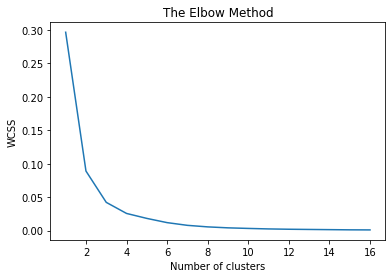

In [9]:
from sklearn.cluster import KMeans
Res_clustering = Ind_Res.drop(["Neighborhoods", "#Cases"], 1)
wcss = []
for i in range(1, 17):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Res_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 17), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(Res_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [11]:
kmeans.labels_[0:10]

array([2, 0, 0, 0, 0, 0, 0, 1, 2, 2])

In [12]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
Res_merged = Ind_Res.copy()

# add clustering labels
Res_merged["Rest Cluster Labels"] = kmeans.labels_

In [13]:
Res_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
Res_merged.head()

,Neighborhood,Indian Restaurant,#Cases,Rest Cluster Labels
0,A I Staff Colony S.O,0.118421,0,2
1,Aareymilk Colony S.O,0.178082,13,0
2,Agripada S.O,0.180000,3,0
3,Ambewadi S.O (Mumbai),0.140000,6,0
4,Andheri East S.O,0.200000,1,0


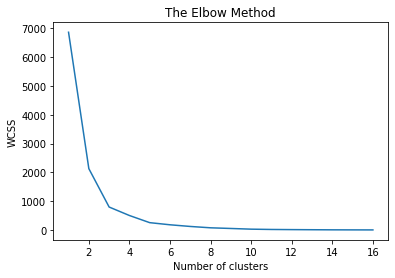

In [14]:
from sklearn.cluster import KMeans
Res_clustering = Ind_Res.drop(["Neighborhoods", "Indian Restaurant"], 1)
wcss = []
for i in range(1, 17):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Res_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 17), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(Res_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [16]:
kmeans.labels_[0:10]

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [17]:
# add clustering labels
Res_merged["Cases Cluster Labels"] = kmeans.labels_

In [18]:
Res_merged.head()

,Neighborhood,Indian Restaurant,#Cases,Rest Cluster Labels,Cases Cluster Labels
0,A I Staff Colony S.O,0.118421,0,2,0
1,Aareymilk Colony S.O,0.178082,13,0,1
2,Agripada S.O,0.180000,3,0,0
3,Ambewadi S.O (Mumbai),0.140000,6,0,0
4,Andheri East S.O,0.200000,1,0,0


In [19]:
df.rename(columns = {"Post Office": "Neighborhood"}, inplace = True)
df_Map = df.merge(Res_merged, on = "Neighborhood", how = "right")

In [20]:
df_Map

,Neighborhood,District,Pincode,#Cases_x,Latitude,Longitude,Indian Restaurant,#Cases_y,Rest Cluster Labels,Cases Cluster Labels
0,A I Staff Colony S.O,Mumbai,400029,0,19.081566,72.866021,0.118421,0,2,0
1,Aareymilk Colony S.O,Mumbai,400065,13,19.166150,72.859410,0.178082,13,0,1
2,Agripada S.O,Mumbai,400011,3,18.970512,72.817322,0.180000,3,0,0
3,Ambewadi S.O (Mumbai),Mumbai,400004,6,18.957690,72.806220,0.140000,6,0,0
4,Andheri East S.O,Mumbai,400069,1,19.113060,72.890290,0.200000,1,0,0
...,...,...,...,...,...,...,...,...,...,...
63,Dr Deshmukh Marg S.O,Mumbai,400026,0,18.956915,72.823504,0.240000,0,1,0
64,Falkland Road S.O,Mumbai,400008,3,18.960576,72.825066,0.240000,3,1,0
65,FCI S.O,Mumbai,400074,16,18.940170,72.834830,0.110000,16,2,1
66,Ghatkopar West S.O,Mumbai,400086,10,19.084000,72.906760,0.200000,10,0,1


In [22]:
df_Map.to_csv('df_Map.csv', index = False)

In [23]:
df_Map = pd.read_csv('df_Map.csv')

In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(3)
rainbow = ['blue', 'yellow', 'darkgreen']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Map['Latitude'], df_Map['Longitude'], df_Map['Neighborhood'], df_Map['Rest Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=(cluster+1)*3+2,
        popup=label,
        color=rainbow[cluster - 1],
        fill=True,
        fill_color=rainbow[cluster - 1],
        fill_opacity=0.2).add_to(map_clusters)
    
x = np.arange(3)
rainbow = ['red', 'darkred', 'pink']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Map['Latitude'], df_Map['Longitude'], df_Map['Neighborhood'], df_Map['Cases Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lon],
        radius=(cluster+1)*3+2,
        number_of_sides = 3,
        popup=label,
        color=rainbow[cluster - 1],
        fill_color=rainbow[cluster - 1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [29]:
map_clusters.save('Mumbai_COVID_Rest.html')